# Regresion Lineal Múltiple
Para continuar con un modelo lineal, presentaré la regresión lineal múltiple.
Este modelo es similar al anterior pero en vez de modelar la variable dependiente $y$ con una sola variable independiente $x$, usaremos mas de una.

Matemáticamente, tendremos la siguiente expresion $\hat{y}_i = (\sum_i x_i \beta_i) + \beta_0$.
Con dos variables, esto corresponde a un plano: $\hat{y}_i = x_1 \beta_1 + x_2 \beta_2 + \beta_0$.

La idea detrás de este modelo es la misma, podemos estimar una variable a través de la ponderación lineal de otras. El criterio para evaluar al modelo es el mismo que el anterior, la pérdida cuadrática media: $\frac{1}{m} \sum_i (y_i - \hat{y}_i)^2$.

Así mismo, buscamos optimizar el costo a través del calculo del gradiente de la función.
Veamos un ejemplo de estimación de precios de casa, para obtener los datos usen el siguiente [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) o clonen el repo donde agregué una carpeta de datos.

Para hacer uso de algoritmos de aprendizaje de maquina, hacemos referencia a [scikit-learn](https://scikit-learn.org/stable/index.html)

In [62]:
import pandas as pd
import numpy as np

En esta ocasión también abordaremos dos conceptos importantes, conjunto de entrenamiento y conjunto de prueba.

In [85]:
entrenamiento = pd.read_csv('data/house_train.csv')
from sklearn.model_selection import train_test_split
entrenamiento_x, prueba_x, entrenamiento_y, prueba_y = train_test_split(entrenamiento, y, test_size=0.15, random_state=42)


In [16]:
print(entrenamiento.shape, prueba.shape)
entrenamiento.head(3)

((1460, 81), (1459, 80))


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [91]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
Id                  1460 non-null int64
MSSubClass          1460 non-null int64
MSZoning            1460 non-null object
LotFrontage         1201 non-null float64
LotArea             1460 non-null int64
Street              1460 non-null object
Alley               91 non-null object
LotShape            1460 non-null object
LandContour         1460 non-null object
Utilities           1460 non-null object
LotConfig           1460 non-null object
LandSlope           1460 non-null object
Neighborhood        1460 non-null object
Condition1          1460 non-null object
Condition2          1460 non-null object
BldgType            1460 non-null object
HouseStyle          1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
RoofStyle           1460 non-null object

X = [x1, x2, x3, x4]
$X \in \R^{m} \times \R^{4}$ 

In [88]:
entrenamiento['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [27]:
var_objetivo = 'SalePrice'
variables = ["MSSubClass", "LotShape", "YearBuilt", "YrSold"]
X = entrenamiento[variables]
y = entrenamiento[var_objetivo]
print(X.shape, y.shape)

((1460, 4), (1460,))


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [44]:
enc_lotshape = OneHotEncoder()
enc_lotshape.fit(X['LotShape'].values.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<type 'numpy.float64'>, handle_unknown='error', n_values=None,
       sparse=True)

In [54]:
transformed = enc_lotshape.transform(entrenamiento['LotShape'].values.reshape(-1,1)).toarray()
transformed_df = pd.DataFrame(transformed, columns=['var{}'.format(i) for i in range(4)]) # instanciar dataframe con un numpy array
X = X[[variable for variable in variables if variable != 'LotShape']]
X = pd.concat([X, transformed_df], axis=1)
X.head(3)

,MSSubClass,YearBuilt,YrSold,var0,var1,var2,var3
0,60,2003,2008,0.0,0.0,0.0,1.0
1,20,1976,2007,0.0,0.0,0.0,1.0
2,60,2001,2008,1.0,0.0,0.0,0.0


In [55]:
modelo = LinearRegression()
modelo.fit(X, y)  # entrenamiento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
y_hat = modelo.predict(X) # estimacion o prediciónn
print(type(y_hat))
entrenamiento['y_hat'] = y_hat # crear columna en dataframe de prediccion
entrenamiento['error_absoluto'] = np.abs(entrenamiento[var_objetivo] - entrenamiento['y_hat'])
entrenamiento['error_cuadratico'] = np.power(entrenamiento[var_objetivo] - entrenamiento['y_hat'], 2)
entrenamiento['over_under'] = (entrenamiento[var_objetivo] - entrenamiento['y_hat'])
entrenamiento['over_under'] = entrenamiento['over_under'].apply(lambda x: 1 if x >= 0 else -1)
entrenamiento[[var_objetivo, 'y_hat', 'error_absoluto','error_cuadratico', 'over_under']].describe()

<type 'numpy.ndarray'>


,SalePrice,y_hat,error_absoluto,error_cuadratico,over_under
count,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000
mean,180921.195890,180921.195890,46184.767001,4.380053e+09,-0.241096
std,79442.502883,43909.641816,47418.982847,1.480309e+10,0.970834
min,34900.000000,38219.490556,0.876064,7.674876e-01,-1.000000
25%,129975.000000,153551.609628,16098.676375,2.591675e+08,-1.000000
50%,163000.000000,185229.056708,36484.234529,1.331100e+09,-1.000000
75%,214000.000000,217589.351681,60122.774655,3.614749e+09,1.000000
max,755000.000000,272845.065424,531531.688068,2.825259e+11,1.000000


In [79]:
entrenamiento[['y_hat', var_objetivo]]

,y_hat,SalePrice
0,212560.980811,208500
1,185036.589881,181500
2,231331.646283,223500
3,121254.111531,140000
4,230042.475761,250000
5,221388.011268,143000
6,221133.364498,307000
7,194074.012362,200000
8,121271.291690,129900
9,110156.417353,118000


In [78]:
entrenamiento.groupby('over_under').count() / entrenamiento.shape[0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,y_hat,error_absoluto,error_cuadratico
over_under,,,,,,,,,,,,,,,,,,,,,
-1,0.620548,0.620548,0.620548,0.504110,0.620548,0.620548,0.028767,0.620548,0.620548,0.620548,...,0.026027,0.620548,0.620548,0.620548,0.620548,0.620548,0.620548,0.620548,0.620548,0.620548
1,0.379452,0.379452,0.379452,0.318493,0.379452,0.379452,0.033562,0.379452,0.379452,0.379452,...,0.010959,0.379452,0.379452,0.379452,0.379452,0.379452,0.379452,0.379452,0.379452,0.379452


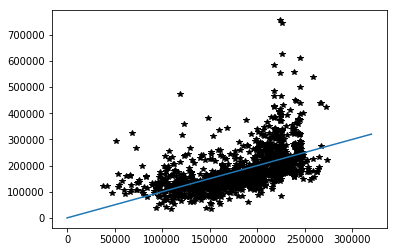

In [74]:
# y ~ y_hat
import matplotlib.pyplot as plt
xid = np.linspace(0, 320000, 1000)
plt.plot(y_hat, y, 'k*')
plt.plot(xid,xid)
plt.show()

In [83]:
r2_score(entrenamiento[var_objetivo], y_hat)

0.3055019256768656

In [84]:
mean_squared_error(entrenamiento[var_objetivo], y_hat)

4380052527.688213